# Applying ML Regression Algorithms: Prices

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')

## Loading data

In [2]:
root = '../data/regression/cars_reg.csv'

df = pd.read_csv(root)
df.head()

,year,kms,seats,power,co2_emiss,height,length,width,trunk_vol,max_speed,...,doors_2,doors_3,doors_4,doors_5,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded
0,2014,37125,2,71,99,157,270,156,203,145,...,1.0,0.0,0.0,0.0,11039.980916,10171.125628,15841.032810,17003.852965,28170.085203,20696.065144
1,2009,0,4,200,179,140,426,181,292,235,...,0.0,1.0,0.0,0.0,17058.096993,13160.993789,18052.176748,17003.852965,28170.085203,31261.850521
2,2021,0,5,150,109,142,453,180,430,222,...,0.0,0.0,1.0,0.0,23593.497861,23508.383973,18554.493671,21242.844857,28170.085203,31261.850521
3,2017,85000,5,190,142,162,467,188,500,212,...,0.0,0.0,0.0,1.0,23593.497861,36412.589552,16569.441935,17003.852965,28170.085203,31261.850521
4,2005,95017,2,506,488,123,446,191,344,189,...,1.0,0.0,0.0,0.0,12506.369072,17783.891805,17303.956434,17436.456262,28170.085203,31261.850521


## Separating the data into features (X) and target (y) variables

In [3]:
# Train-Test Split
from sklearn.model_selection import train_test_split

In [4]:
# Removing some outliers
features = df.drop('price', axis=1)
target = df['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Applying Regression Models
The objective is to obtain the best posible model by evaluating the performance of 7 models

In [6]:
# Regression linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Tree models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Support Vector Machine model
from sklearn.svm import SVR

# Gradient Boosting models
import xgboost as xgb
from catboost import CatBoostRegressor

# Model Evaluators
from sklearn import model_selection
from modules.model_evaluator import eval_reg
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, explained_variance_score as evs

Importing `scikit-learn` main functions for training the model.

Gradient Boost Algorithms were explored and understood following [this Medium Article](https://towardsdatascience.com/lightgbm-vs-xgboost-which-algorithm-win-the-race-1ff7dd4917d)

### Linear Regression

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.8175

RMSE = 5523.5713

MSE = 30509839.5307

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 3521.4496

EVS = 81.7527%



### Ridge Regression

In [8]:
rd = Ridge(alpha=100)
rd.fit(X_train, y_train)

predictions = rd.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.8176

RMSE = 5521.9167

MSE = 30491563.9708

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 3517.1937

EVS = 81.7637%



### Random Forest Regressor

In [9]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.9383

RMSE = 3211.6325

MSE = 10314583.2267

MSLE = 0.0402

MAE = 1790.2336

EVS = 93.8314%



### Support Vector Regression

In [10]:
svr = SVR()
svr.fit(X_train, y_train)

predictions = svr.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.1113

RMSE = 12189.5592

MSE = 148585352.8881

MSLE = 0.4265

MAE = 7666.2253

EVS = 16.4782%



### XGBoost Regressor

In [11]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.9341

RMSE = 3320.1305

MSE = 11023266.3021

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 1938.6801

EVS = 93.4071%



### Gradient Boosting Regressor

In [12]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

predictions = gb_model.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.9112

RMSE = 3853.6126

MSE = 14850329.7787

MSLE = 0.0571

MAE = 2358.5717

EVS = 91.1189%



### CatBoost Regressor

In [13]:
cb_model = CatBoostRegressor(verbose=False)
cb_model.fit(X_train, y_train)

predictions = cb_model.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.9414

RMSE = 3130.1646

MSE = 9797930.3857

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 1865.0171

EVS = 94.1400%



---

## Residual plot: Visualizing predictions of the model

In [14]:
import matplotlib.pyplot as plt

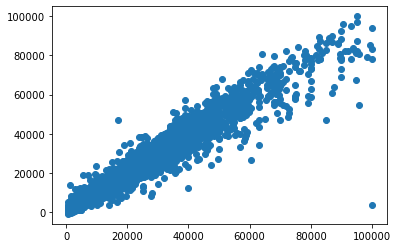

In [15]:
plt.scatter(y_test, predictions);

## Comparing ML Regression Algorithms 

Based on [Jason Brownlee's article](https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/).

Since the performance of the `SVR` ($R^2 = 0.1427$) was really poor, it will be excluded from the next model analysis.

`k-fold` is a popular cross-validation technique. It provides visibility about the generalization ability of the model by iterating through different sets.
i.e. say k=10 for example, 9 folds for training and 1 fold for testing purpose and this repeats unless all folds get a chance to be the test set one by one.

In [16]:
from time import time

# example
start_time = time()
exec_time = time() - start_time

print(exec_time)

3.6716461181640625e-05


In [17]:
# Set seed to obtain the same random numbers
seed = 42

# Listing models
models = []
models.append(('LR', LinearRegression()))
models.append(('RD', Ridge(alpha=100)))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', xgb.XGBRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('CB', CatBoostRegressor(verbose=False)))

# Evaluate each model
names = []
results = []
mins = []
quartiles_1 = []
medians = []
means = []
stds = []
quartiles_3 = []
maxs = []
times = []
scoring = 'r2'

# Defining the algorithm function
def run_cv_algorithm(name, model):
    '''
    Function that runs the cross-validation (CV) for the named algorithm
    - name: Designation of the algorithm. 
    - model: Algorithm to be applied.
    '''
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(estimator=model,
                                                 X=features,
                                                 y=target,
                                                 cv=kfold,
                                                 scoring=scoring)
    # appending stats to lists
    names.append(name)
    results.append(cv_results)
    mins.append(cv_results.min())
    quartiles_1.append(np.percentile(cv_results, 25)) # Q1
    medians.append(np.median(cv_results)) # Q2 = median
    means.append(cv_results.mean())
    stds.append(cv_results.std())
    quartiles_3.append(np.percentile(cv_results, 75)) # Q3
    maxs.append(cv_results.max())
    
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

# Executing the function for every model in the list: models
for name, model in models:
    # set start time
    start_time = time()
    
    # running algorithm
    run_cv_algorithm(name, model)
    
    # set end time: execution time
    exec_time = time() - start_time
    
    # Appending to the main list
    times.append(exec_time)
    
    print("{} execution time (sec): {}".format(name, exec_time))

LR: 0.8176869949230893 (0.009140311684250597)
LR execution time (sec): 1.4855592250823975
RD: 0.817670624435617 (0.009147751919981661)
RD execution time (sec): 0.35996341705322266
RF: 0.9385075360368992 (0.0047605288042063855)
RF execution time (sec): 545.3344223499298
XGB: 0.9369911296136836 (0.0029727462621703406)
XGB execution time (sec): 51.04178762435913
GB: 0.9095661991056543 (0.005380484459074251)
GB execution time (sec): 113.22585391998291
CB: 0.9417430645810623 (0.003628675611342137)
CB execution time (sec): 335.94901847839355


In [18]:
# Creating a DataFrame to see the performance of each model:
df_models = pd.DataFrame({'model': names,
                          'min_r2_score': mins,
                          '1st_quantile': quartiles_1,
                          'median_r2_score': medians,
                          'mean_r2_score': means,
                          'std_r2_score': stds,
                          '3rd_quantile': quartiles_3,
                          'max_r2_score': maxs,
                          'exec_time_sec': times})

# Creating a time_score_ratio
df_models['time_score_ratio'] = df_models['mean_r2_score'] / df_models['exec_time_sec']

# Rounding to 4 decimals
round_cols = dict(zip(df_models.columns, len(df_models.columns)*[4]))
df_models = df_models.round(round_cols)

df_models

,model,min_r2_score,1st_quantile,median_r2_score,mean_r2_score,std_r2_score,3rd_quantile,max_r2_score,exec_time_sec,time_score_ratio
0,LR,0.8048,0.8122,0.8144,0.8177,0.0091,0.8235,0.8329,1.4856,0.5504
1,RD,0.8048,0.8121,0.8144,0.8177,0.0091,0.8234,0.8329,0.3600,2.2715
2,RF,0.9285,0.9364,0.9381,0.9385,0.0048,0.9412,0.9472,545.3344,0.0017
3,XGB,0.9325,0.9346,0.9369,0.9370,0.0030,0.9396,0.9415,51.0418,0.0184
4,GB,0.9000,0.9061,0.9093,0.9096,0.0054,0.9143,0.9169,113.2259,0.0080
5,CB,0.9363,0.9399,0.9408,0.9417,0.0036,0.9428,0.9483,335.9490,0.0028


From this table, it is easy to conclude that `CatBoost` is the best algorithm to be considered. However, it is better to not disregard `XGBoost` & `RF` algorithms.

In [19]:
import seaborn as sns

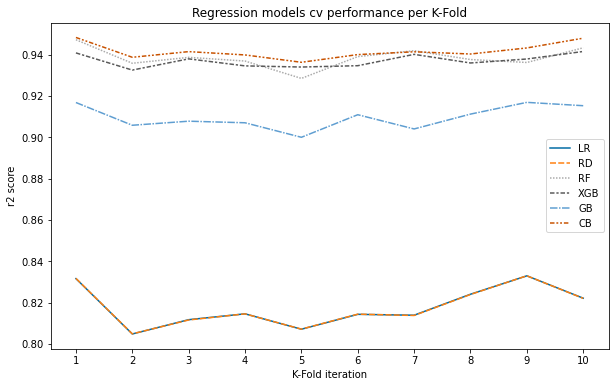

In [20]:
plt.style.use('tableau-colorblind10')

plt.figure(figsize=(10, 6))

sns.lineplot(data=results, dashes=True)

plt.title('Regression models cv performance per K-Fold')
plt.xticks(list(range(0, 10)), list(range(1, 11)))
plt.xlabel('K-Fold iteration')
plt.ylabel('r2 score')

plt.legend(df_models.model.to_list())

plt.show()

In [21]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha="center",
                    va="bottom")

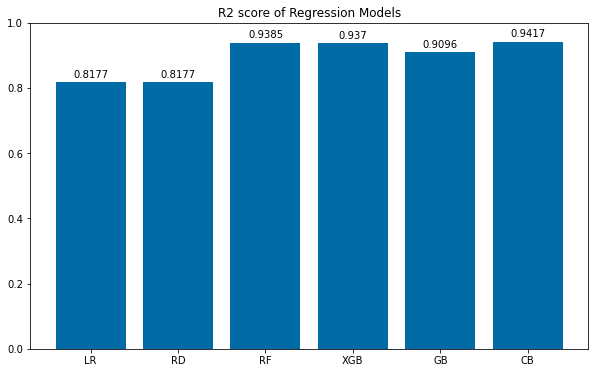

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

rect1 = ax.bar(df_models['model'], df_models['mean_r2_score'])

plt.title('R2 score of Regression Models')
plt.gca().set_ylim([0, 1])

autolabel(rect1)

plt.show()

`CB` was the model with the best performance after applying a cross-validation process. However, it is also by far the most time consuming.

Having a look at the `time_score_ratio` parameter, it is possible to find the most efficient model in terms of `r2_score` and `exec_time`. In this way, the best model can be found when there is a concern about time due to the high amount of data that will feed the model. Linear models are the ones with the highest ratio, nevertheless the $r2\_score$ is not enough to be considered as potential models.

In case that delays in execution could be a problem, `Boosting` algorithms could be the most suitable option. This is another reason to conclude that `CatBoost` is the best performer, while `RandomForest` takes really long to be processed.

Time to have a look at the performance of each model using `boxplots`.

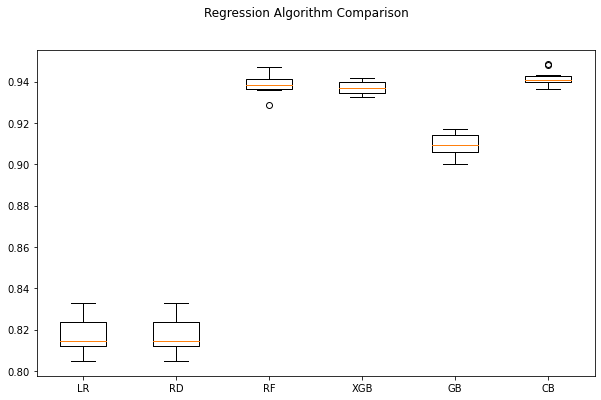

In [23]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression Algorithm Comparison')

ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In the boxplot above, it is possible to see the great difference in performance of the `Boosting & RandomForest` compared to the `LinearRegression & Ridge` algorithms.

Therefore, further investigations about how to improve the performance of the final prediction will be focused on the 3 models below: `RF, XGB, CB`

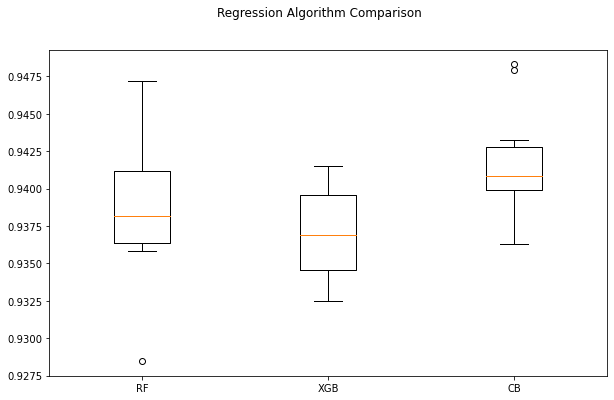

In [24]:
# boxplot best algorithms comparison
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression Algorithm Comparison')

ax = fig.add_subplot(111)
plt.boxplot(results[2:4] + [results[5]])
ax.set_xticklabels(names[2:4] + [names[5]])

plt.show()